In [74]:
import torch
from torch import nn
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
n = 4
def make_features(x) :
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1, n + 1)], 1)

In [76]:
import random
W_target = torch.FloatTensor([random.randint(-1000, 1000) * 0.01 for i in range(n)]).unsqueeze(1)
b_target = torch.FloatTensor([random.randint(-100, 1000) * 0.01])

In [77]:
# 定义实际函数

def f(x) :
    return x.mm(W_target) + b_target[0]

In [78]:
# 生成训练集。随机取数，然后生成x，然后生成y

def get_batch(batch_size = 32, random = None) :
    if random is None :
        random = torch.randn(batch_size)
    batch_size = random.size()
    x = make_features(random)
    y = f(x)
    if torch.cuda.is_available() :
        return Variable(x).cuda(), Variable(y).cuda()
    else :
        return Variable(x), Variable(y)

In [79]:
class LinearRegression(nn.Module):
    def __init__(self,n):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(n,1)
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
if torch.cuda.is_available():
    model = LinearRegression(n).cuda()
else:
    model = LinearRegression(n)

In [80]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 1e-3)

In [81]:
# 开始训练

epoch = 0
while True :
    # 获得数据
    batch_x, batch_y = get_batch()
    # 前向计算
    output = model(batch_x)
    # 计算损失函数
    loss = criterion(output, batch_y)
    print_loss = loss.item()
    # 参数更新
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    epoch += 1
    if print_loss < 1e-3 :
        break

print("the number of epoches :", epoch)

the number of epoches : 7607


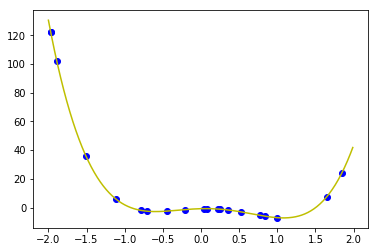

In [82]:
import numpy as np
x = [random.randint(-200, 200) * 0.01 for i in range(20)]
x = np.array(sorted(x))
feature_x, y = get_batch(random = torch.from_numpy(x).float())
y = y.data.numpy()
plt.plot(x, y, 'bo', label='Original data')

model.eval()
x_sample = np.arange(-2, 2, 0.01)
x, y = get_batch(random = torch.from_numpy(x_sample).float())
y = model(x)
y_sample = y.data.numpy()
plt.plot(x_sample, y_sample,'y-', label = 'Fitting Line')
plt.show()

def get_batch(batch_size = 32, random = None) :
    if random is None :
        random = torch.randn(batch_size)
    batch_size = random.size()
    x = make_features(random)
    y = f(x)
    if torch.cuda.is_available() :
        return Variable(x).cuda(), Variable(y).cuda()
    else :
        return Variable(x), Variable(y)


In [83]:
# 定义函数输出形式
def func_format(weight, bias, n) :
    func = ''
    for i in range(n, 0, -1) :
        func += ' {:.2f} * x^{} +'.format(weight[i - 1], i)
    return 'y =' + func + ' {:.2f}'.format(bias[0])
    
predict_weight = model.linear.weight.data.numpy().flatten()
predict_bias = model.linear.bias.data.numpy().flatten()
print('predicted function :', func_format(predict_weight, predict_bias, n))
real_W = W_target.numpy().flatten()
real_b = b_target.numpy().flatten()
print('real      function :', func_format(real_W, real_b, n))

predicted function : y = 7.90 * x^4 + -5.78 * x^3 + -9.70 * x^2 + 1.31 * x^1 + -0.79
real      function : y = 7.91 * x^4 + -5.78 * x^3 + -9.75 * x^2 + 1.32 * x^1 + -0.74
